In [79]:
!git clone https://github.com/Ramlaoui/text-flappy-bird
!pip install git+https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git
!git clone https://github.com/Talendar/flappy-bird-gym

Cloning into 'text-flappy-bird'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 2), reused 8 (delta 2), pack-reused 0
Receiving objects: 100% (11/11), 1.41 MiB | 1.73 MiB/s, done.
Resolving deltas: 100% (2/2), done.
  Cloning https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to /private/var/folders/33/0_w6pc113h9fh86b1cqpzckr0000gn/T/pip-req-build-r57a9a2b
  Running command git clone -q https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git /private/var/folders/33/0_w6pc113h9fh86b1cqpzckr0000gn/T/pip-req-build-r57a9a2b


In [80]:
import os, sys
import gymnasium as gym
import time
from copy import deepcopy

import text_flappy_bird_gym

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
env_distance = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
obs_distance = env_distance.reset()

env_screen = gym.make('TextFlappyBird-screen-v0', height = 15, width = 20, pipe_gap = 4)
obs_screen = env_screen.reset()

## Monte Carlo Agent

We start by defining the environment and the agent, and then we will import the Monte Carlo agent from the `monte_carlo.py` file where it is implemented.

Let's check the agent's performance in the environment before training.

In [82]:
from monte_carlo import MonteCarloAgent

mc_agent = MonteCarloAgent(env_distance, gamma=0.9, epsilon=0.1)

In [83]:
mc_agent.play(render=True, slow=True)

Text Flappy Bird!
Score: 0
----------------------
[      |         |   ]
[      |             ]
[      |             ]
[      |             ]
[     *|             ]
[      |         |   ]
[                |   ]
[                |   ]
[                |   ]
[                |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Flap)
Distance From Pipe (dx=0,dy=-4)

Game over!


13

The agent struggles to even get a single point in the environment before training.

In [84]:
mc_agent.train(100, log_every=50)

Episode 2 - Reward: 12:   2%|▏         | 2/100 [00:00<00:00, 913.19it/s]

Episode 83 - Reward: 23:  83%|████████▎ | 83/100 [00:00<00:00, 978.16it/s] 

Episode 0 - Average score: 12.0
Episode 50 - Average score: 11.36


Episode 99 - Reward: 23: 100%|██████████| 100/100 [00:00<00:00, 935.82it/s]


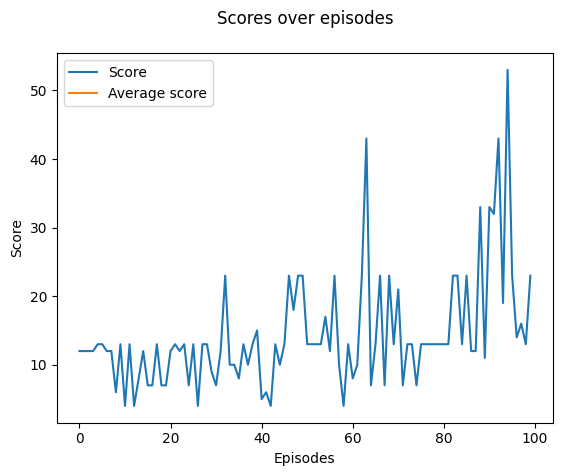

In [85]:
mc_agent.plot_score()

In [86]:
mc_agent.play(render=True, slow=True)

Text Flappy Bird!
Score: 0
----------------------
[      |         |   ]
[                |   ]
[                |   ]
[                |   ]
[                |   ]
[      |         |   ]
[     *|         |   ]
[      |             ]
[      |             ]
[      |             ]
[      |             ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=0,dy=3)

Game over!


13

In [87]:
mc_agent.train(1000, log_every=100)

  0%|          | 0/1000 [00:00<?, ?it/s]

Episode 48 - Reward: 12:   5%|▍         | 48/1000 [00:00<00:01, 567.05it/s]

Episode 0 - Average score: 14.65


Episode 109 - Reward: 13:  11%|█         | 109/1000 [00:00<00:01, 579.50it/s]

Episode 100 - Average score: 23.5


Episode 204 - Reward: 23:  20%|██        | 204/1000 [00:00<00:01, 545.80it/s] 

Episode 200 - Average score: 28.9


Episode 369 - Reward: 79:  37%|███▋      | 369/1000 [00:00<00:01, 419.57it/s] 

Episode 300 - Average score: 51.42


Episode 453 - Reward: 187:  45%|████▌     | 453/1000 [00:01<00:01, 359.40it/s]

Episode 400 - Average score: 75.48


Episode 548 - Reward: 273:  55%|█████▍    | 548/1000 [00:01<00:01, 284.88it/s]

Episode 500 - Average score: 88.76


Episode 650 - Reward: 52:  65%|██████▌   | 650/1000 [00:01<00:01, 269.48it/s] 

Episode 600 - Average score: 82.71


Episode 740 - Reward: 166:  74%|███████▍  | 740/1000 [00:02<00:01, 231.33it/s]

Episode 700 - Average score: 79.85


Episode 845 - Reward: 48:  84%|████████▍ | 845/1000 [00:02<00:00, 212.65it/s] 

Episode 800 - Average score: 90.07


Episode 934 - Reward: 193:  93%|█████████▎| 934/1000 [00:03<00:00, 190.38it/s]

Episode 900 - Average score: 88.83


Episode 999 - Reward: 47: 100%|██████████| 1000/1000 [00:03<00:00, 268.20it/s]


In [88]:
mc_agent.play(render=True, slow=False)

Text Flappy Bird!
Score: 0
----------------------
[      |         |   ]
[      |         |   ]
[     *|         |   ]
[      |             ]
[      |             ]
[      |             ]
[                    ]
[                |   ]
[                |   ]
[                |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=0,dy=-6)

Game over!


13

In [89]:
mc_agent.train(3000, log_every=1000)

Episode 3 - Reward: 80:   0%|          | 3/3000 [00:00<00:32, 92.55it/s] 

Episode 0 - Average score: 71.272


Episode 1028 - Reward: 53:  34%|███▍      | 1028/3000 [00:07<00:15, 125.82it/s] 

Episode 1000 - Average score: 104.881


Episode 2016 - Reward: 125:  67%|██████▋   | 2016/3000 [00:19<00:12, 77.04it/s] 

Episode 2000 - Average score: 116.335


Episode 2999 - Reward: 223: 100%|██████████| 3000/3000 [00:36<00:00, 82.19it/s]


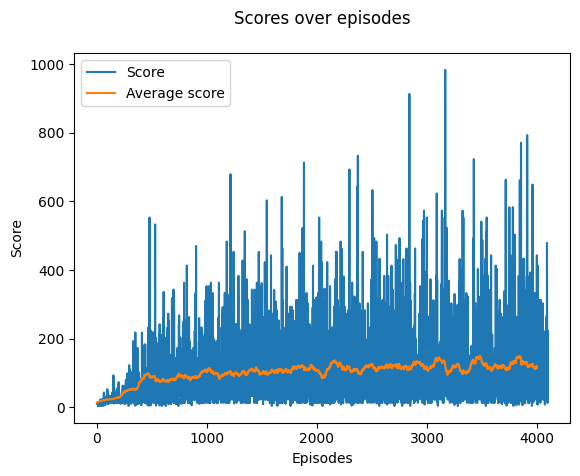

In [90]:
mc_agent.plot_score()

### Tuning the Monte Carlo Agent

Episode 211 - Reward: 23:  11%|█         | 211/2000 [00:00<00:01, 1134.48it/s]

Episode 0 - Average score: 12.0


Episode 194 - Reward: 23:  10%|▉         | 194/2000 [00:00<00:01, 976.43it/s]

Episode 0 - Average score: 12.0


Episode 211 - Reward: 13:  11%|█         | 211/2000 [00:00<00:01, 1014.52it/s]

Episode 0 - Average score: 4.0


Episode 181 - Reward: 13:   9%|▉         | 182/2000 [00:00<00:01, 950.88it/s]

Episode 0 - Average score: 13.0


Episode 229 - Reward: 16:  11%|█▏        | 229/2000 [00:00<00:01, 1207.10it/s]

Episode 0 - Average score: 7.0


Episode 236 - Reward: 15:  12%|█▏        | 236/2000 [00:00<00:01, 1342.83it/s]

Episode 0 - Average score: 4.0


Episode 182 - Reward: 20:   9%|▉         | 182/2000 [00:00<00:01, 999.21it/s]

Episode 0 - Average score: 13.0


Episode 201 - Reward: 13:  10%|█         | 201/2000 [00:00<00:01, 1006.83it/s]

Episode 0 - Average score: 13.0


Episode 211 - Reward: 13:  11%|█         | 211/2000 [00:00<00:01, 1059.43it/s]

Episode 0 - Average score: 13.0


Episode 179 - Reward: 17:   9%|▉         | 179/2000 [00:00<00:01, 1040.77it/s]

Episode 0 - Average score: 6.0


Episode 154 - Reward: 37:   8%|▊         | 154/2000 [00:00<00:02, 799.21it/s]

Episode 0 - Average score: 7.0


Episode 177 - Reward: 16:   9%|▉         | 177/2000 [00:00<00:01, 973.72it/s]

Episode 0 - Average score: 4.0


Episode 166 - Reward: 33:   8%|▊         | 166/2000 [00:00<00:01, 1030.04it/s]

Episode 0 - Average score: 13.0


Episode 140 - Reward: 13:   7%|▋         | 140/2000 [00:00<00:02, 761.69it/s]

Episode 0 - Average score: 13.0


Episode 153 - Reward: 23:   8%|▊         | 154/2000 [00:00<00:02, 767.70it/s]

Episode 0 - Average score: 13.0


Episode 169 - Reward: 43:   8%|▊         | 169/2000 [00:00<00:02, 909.54it/s]

Episode 0 - Average score: 4.0


Episode 169 - Reward: 13:   8%|▊         | 169/2000 [00:00<00:02, 886.44it/s]

Episode 0 - Average score: 10.0


Episode 206 - Reward: 13:  10%|█         | 206/2000 [00:00<00:01, 1153.79it/s]

Episode 0 - Average score: 13.0


Episode 189 - Reward: 23:   9%|▉         | 189/2000 [00:00<00:01, 1178.89it/s]

Episode 0 - Average score: 9.0


Episode 169 - Reward: 32:   8%|▊         | 169/2000 [00:00<00:01, 999.04it/s] 

Episode 0 - Average score: 12.0


Episode 150 - Reward: 13:   8%|▊         | 150/2000 [00:00<00:02, 893.85it/s]

Episode 0 - Average score: 4.0


Episode 124 - Reward: 21:   6%|▌         | 124/2000 [00:00<00:02, 628.10it/s] 

Episode 0 - Average score: 6.0


Episode 144 - Reward: 223:   7%|▋         | 144/2000 [00:00<00:02, 846.82it/s]

Episode 0 - Average score: 13.0


Episode 149 - Reward: 33:   7%|▋         | 149/2000 [00:00<00:02, 910.27it/s]

Episode 0 - Average score: 11.0


Episode 159 - Reward: 8:   8%|▊         | 159/2000 [00:00<00:02, 797.95it/s] 

Episode 0 - Average score: 13.0


Episode 120 - Reward: 17:   6%|▌         | 120/2000 [00:00<00:03, 609.98it/s]

Episode 0 - Average score: 46.0


Episode 160 - Reward: 4:   8%|▊         | 160/2000 [00:00<00:01, 1044.26it/s]  

Episode 0 - Average score: 12.0


Episode 147 - Reward: 19:   7%|▋         | 147/2000 [00:00<00:02, 823.65it/s]

Episode 0 - Average score: 13.0


Episode 145 - Reward: 10:   7%|▋         | 145/2000 [00:00<00:02, 825.86it/s]

Episode 0 - Average score: 13.0


Episode 145 - Reward: 13:   7%|▋         | 145/2000 [00:00<00:02, 773.43it/s]

Episode 0 - Average score: 5.0


Episode 140 - Reward: 23:   7%|▋         | 140/2000 [00:00<00:02, 821.24it/s]

Episode 0 - Average score: 13.0


Episode 134 - Reward: 13:   7%|▋         | 134/2000 [00:00<00:02, 889.69it/s]

Episode 0 - Average score: 4.0


Episode 153 - Reward: 13:   8%|▊         | 153/2000 [00:00<00:01, 982.83it/s]

Episode 0 - Average score: 12.0


Episode 140 - Reward: 23:   7%|▋         | 140/2000 [00:00<00:02, 766.69it/s]

Episode 0 - Average score: 13.0


Episode 138 - Reward: 10:   7%|▋         | 138/2000 [00:00<00:02, 863.31it/s]

Episode 0 - Average score: 13.0


Episode 152 - Reward: 33:   8%|▊         | 152/2000 [00:00<00:01, 933.30it/s]

Episode 0 - Average score: 8.0


Episode 1999 - Reward: 55: 100%|██████████| 2000/2000 [00:05<00:00, 394.23it/s] 


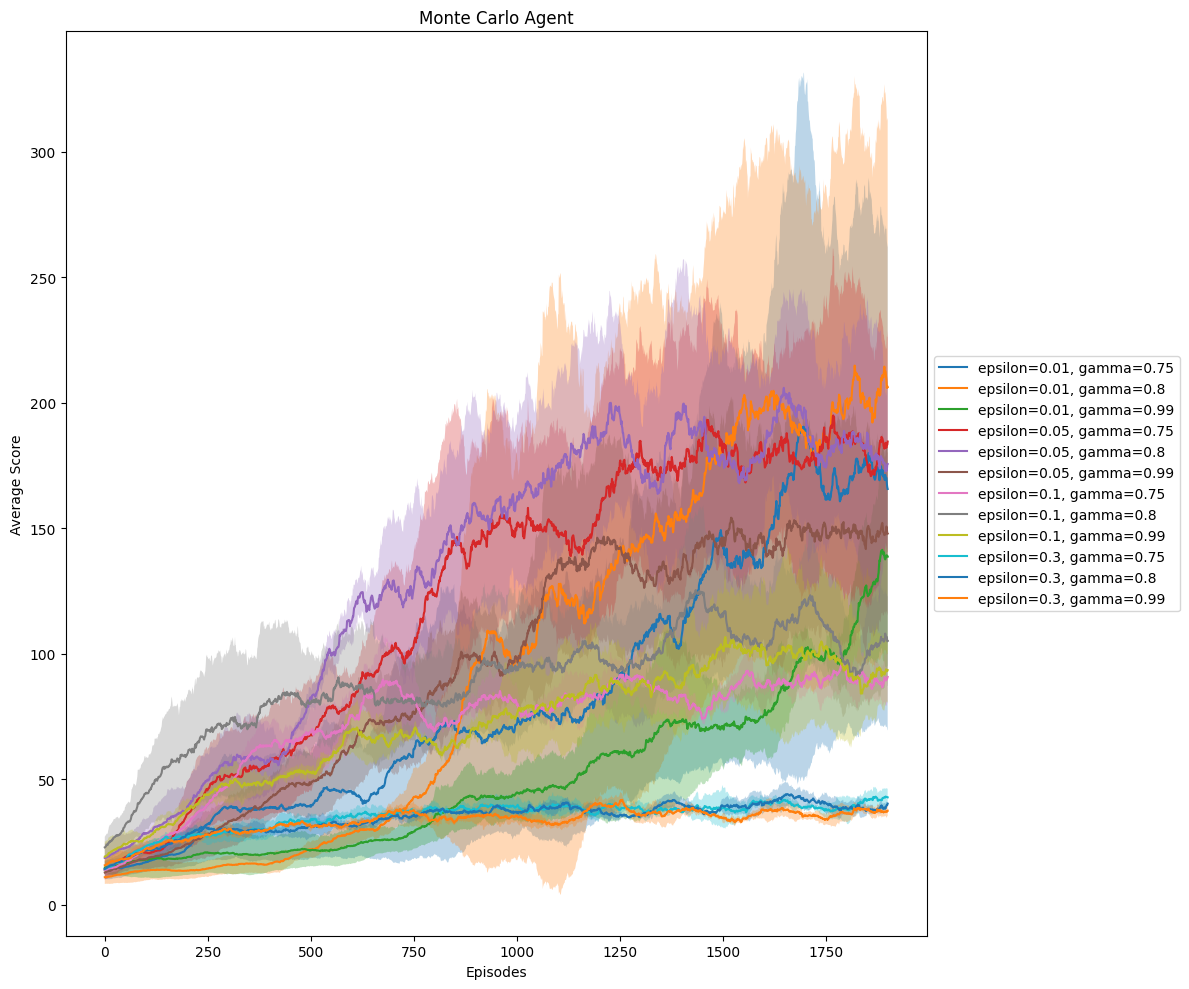

In [91]:
import matplotlib.pyplot as plt
import numpy as np

epsilons = [0.01, 0.05, 0.1, 0.3]
gammas = [0.75, 0.8, 0.99]

plt.subplots(figsize=(12, 10))
for epsilon in epsilons:
    for gamma in gammas:
        smoothed_scores = []
        for seed in range(3):
            mc_agent = MonteCarloAgent(env_distance, gamma=gamma, epsilon=epsilon)
            mc_agent.train(2000, log_every=-1)
            smoothed_scores.append(mc_agent.smoothed_scores)
        smoothed_score_mean = np.mean(smoothed_scores, axis=0)
        smoothed_score_std = np.std(smoothed_scores, axis=0)
        plt.plot(smoothed_score_mean, label=f'epsilon={epsilon}, gamma={gamma}')
        plt.fill_between(range(len(smoothed_score_mean)), smoothed_score_mean - smoothed_score_std, smoothed_score_mean + smoothed_score_std, alpha=0.3)
plt.xlabel('Episodes')
plt.ylabel('Average Score')
plt.title('Monte Carlo Agent')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Episode 204 - Reward: 6:   7%|▋         | 205/3000 [00:00<00:02, 1024.64it/s] 

Episode 0 - Average score: 21.0


Episode 2999 - Reward: 93: 100%|██████████| 3000/3000 [00:10<00:00, 279.12it/s] 


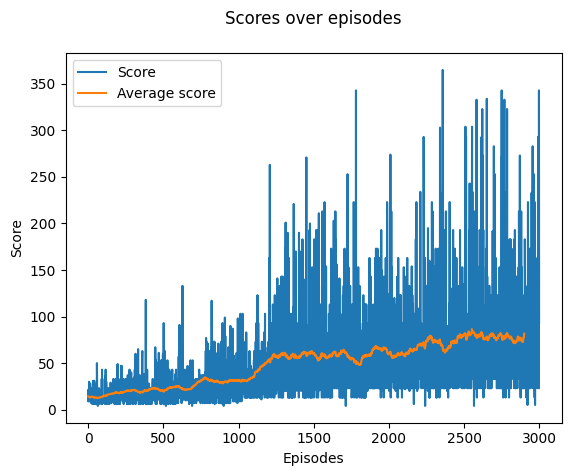

In [92]:
best_mc_agent = MonteCarloAgent(env_distance, gamma=0.8, epsilon=0.01)
best_mc_agent.train(3000, log_every=-1)
best_mc_agent.plot_score()
mc_agent = deepcopy(best_mc_agent)

## Sarsa Agent

We will also import the Sarsa agent from the `sarsa.py` file where it is implemented. In this section we will check the agent's performance in the environment before training and after training and we will analyze the sensitivity of the agent to the different parameters.

In [93]:
from sarsa import SarsaLambdaAgent

sarsa_agent = SarsaLambdaAgent(env_distance, lambda_=0.9, gamma=0.9, epsilon=0.1)

In [94]:
sarsa_agent.play(render=True, slow=True)

Text Flappy Bird!
Score: 0
----------------------
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
[                |   ]
[                    ]
[                    ]
[                    ]
[      |             ]
[      |         |   ]
[     *|         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Idle)
Distance From Pipe (dx=0,dy=4)

Game over!


13

Same as the Monte Carlo agent, the Sarsa agent struggles to even get a single point in the environment before training.

In [95]:
sarsa_agent.train(100, log_every=50)

Episode 99 - Reward: 13: 100%|██████████| 100/100 [00:00<00:00, 1599.95it/s]

Episode 0 - Average score: 7.0
Episode 50 - Average score: 14.52


We notice that trainign the Sarsa agent is much faster than the Monte Carlo agent. This is because the Sarsa agent updates the Q-table after every step, while the Monte Carlo agent updates the Q-table after every episode, making the Sarsa agent more sensitive to the learning rate and the exploration rate.

In [96]:
sarsa_agent.train(10000, log_every=1000)

Episode 136 - Reward: 33:   1%|▏         | 136/10000 [00:00<00:06, 1522.26it/s]

Episode 0 - Average score: 16.356435643564357


Episode 1199 - Reward: 43:  12%|█▏        | 1199/10000 [00:00<00:07, 1127.54it/s] 

Episode 1000 - Average score: 23.846


Episode 2149 - Reward: 123:  21%|██▏       | 2149/10000 [00:02<00:09, 857.50it/s] 

Episode 2000 - Average score: 36.524


Episode 3127 - Reward: 11:  31%|███▏      | 3127/10000 [00:03<00:10, 652.05it/s] 

Episode 3000 - Average score: 52.259


Episode 4117 - Reward: 53:  41%|████      | 4117/10000 [00:04<00:08, 716.81it/s] 

Episode 4000 - Average score: 59.666


Episode 5106 - Reward: 92:  51%|█████     | 5106/10000 [00:06<00:09, 540.34it/s] 

Episode 5000 - Average score: 66.175


Episode 6076 - Reward: 7:  61%|██████    | 6076/10000 [00:08<00:07, 554.02it/s]  

Episode 6000 - Average score: 69.102


Episode 7140 - Reward: 222:  71%|███████▏  | 7140/10000 [00:10<00:04, 572.98it/s]

Episode 7000 - Average score: 73.431


Episode 8122 - Reward: 54:  81%|████████  | 8122/10000 [00:11<00:02, 647.42it/s] 

Episode 8000 - Average score: 63.125


Episode 9099 - Reward: 37:  91%|█████████ | 9099/10000 [00:13<00:01, 552.56it/s] 

Episode 9000 - Average score: 71.406


Episode 9999 - Reward: 113: 100%|██████████| 10000/10000 [00:15<00:00, 665.85it/s]


In [97]:
sarsa_agent.play(render=True, slow=False)

Text Flappy Bird!
Score: 11
----------------------
[      |         |   ]
[                |   ]
[                |   ]
[                |   ]
[                    ]
[      |             ]
[      |             ]
[      |             ]
[      |         |   ]
[      |         |   ]
[     *|         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Flap)
Distance From Pipe (dx=0,dy=7)

Game over!


123

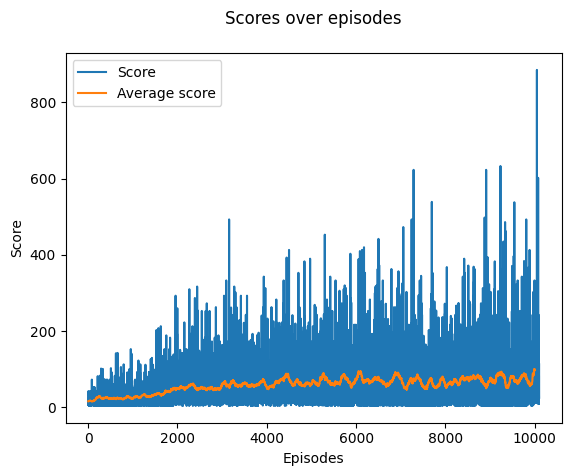

In [98]:
sarsa_agent.plot_score()

We notice that there is still room for improvement in the Sarsa agent's performance, and we will try to train it for longer.

In [99]:
sarsa_agent.train(10000, log_every=1000)

Episode 0 - Reward: 73:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode 0 - Average score: 75.918


Episode 1119 - Reward: 6:  11%|█         | 1119/10000 [00:01<00:16, 544.44it/s]  

Episode 1000 - Average score: 71.152


Episode 2072 - Reward: 249:  21%|██        | 2072/10000 [00:03<00:15, 513.76it/s]

Episode 2000 - Average score: 69.145


Episode 3102 - Reward: 23:  31%|███       | 3102/10000 [00:05<00:12, 545.53it/s] 

Episode 3000 - Average score: 77.71


Episode 4114 - Reward: 58:  41%|████      | 4114/10000 [00:07<00:10, 576.38it/s] 

Episode 4000 - Average score: 79.989


Episode 5120 - Reward: 149:  51%|█████     | 5120/10000 [00:09<00:09, 505.94it/s]

Episode 5000 - Average score: 77.427


Episode 6128 - Reward: 150:  61%|██████▏   | 6128/10000 [00:11<00:06, 635.72it/s]

Episode 6000 - Average score: 63.15


Episode 7110 - Reward: 103:  71%|███████   | 7110/10000 [00:13<00:05, 520.29it/s]

Episode 7000 - Average score: 72.102


Episode 8144 - Reward: 117:  81%|████████▏ | 8144/10000 [00:14<00:02, 685.50it/s]

Episode 8000 - Average score: 66.224


Episode 9104 - Reward: 23:  91%|█████████ | 9104/10000 [00:16<00:01, 496.25it/s] 

Episode 9000 - Average score: 68.199


Episode 9999 - Reward: 43: 100%|██████████| 10000/10000 [00:18<00:00, 545.79it/s]


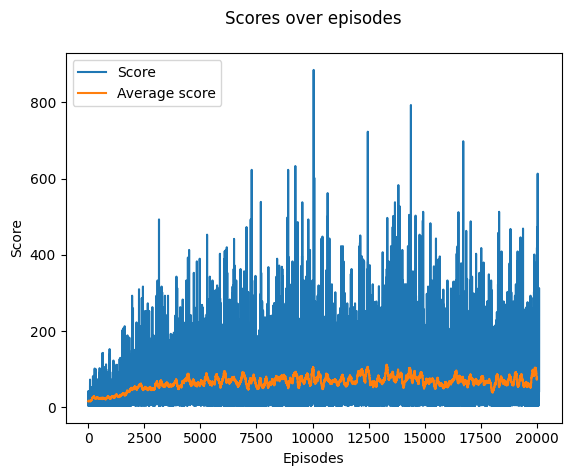

In [100]:
sarsa_agent.plot_score()

### Tuning the Sarsa Agent

Episode 11 - Reward: 13:   0%|          | 11/3000 [00:00<00:01, 2343.90it/s]

Episode 103 - Reward: 33:   3%|▎         | 104/3000 [00:00<00:07, 393.53it/s] 

Episode 0 - Average score: 19.0


Episode 316 - Reward: 11:  11%|█         | 316/3000 [00:00<00:01, 1674.01it/s]

Episode 0 - Average score: 4.0


Episode 325 - Reward: 13:  11%|█         | 325/3000 [00:00<00:01, 1432.02it/s]

Episode 0 - Average score: 13.0


Episode 335 - Reward: 23:  11%|█         | 335/3000 [00:00<00:01, 1530.88it/s]

Episode 0 - Average score: 5.0


Episode 289 - Reward: 6:  10%|▉         | 289/3000 [00:00<00:02, 1263.15it/s] 

Episode 0 - Average score: 11.0


Episode 292 - Reward: 8:  10%|▉         | 292/3000 [00:00<00:02, 1322.70it/s] 

Episode 0 - Average score: 21.0


Episode 262 - Reward: 36:   9%|▊         | 262/3000 [00:00<00:02, 1192.94it/s]

Episode 0 - Average score: 23.0


Episode 191 - Reward: 22:   6%|▋         | 191/3000 [00:00<00:03, 714.01it/s] 

Episode 0 - Average score: 4.0


Episode 299 - Reward: 22:  10%|▉         | 299/3000 [00:00<00:01, 1493.14it/s]

Episode 0 - Average score: 11.0


Episode 328 - Reward: 13:  11%|█         | 329/3000 [00:00<00:01, 1672.22it/s]

Episode 0 - Average score: 13.0


Episode 314 - Reward: 22:  10%|█         | 314/3000 [00:00<00:01, 1868.42it/s]

Episode 0 - Average score: 6.0


Episode 340 - Reward: 10:  11%|█▏        | 340/3000 [00:00<00:01, 1797.58it/s]

Episode 0 - Average score: 9.0


Episode 356 - Reward: 6:  12%|█▏        | 356/3000 [00:00<00:01, 2036.66it/s] 

Episode 0 - Average score: 7.0


Episode 297 - Reward: 5:  10%|▉         | 297/3000 [00:00<00:01, 2166.71it/s] 

Episode 0 - Average score: 8.0


Episode 380 - Reward: 8:  13%|█▎        | 380/3000 [00:00<00:01, 1931.68it/s] 

Episode 0 - Average score: 7.0


Episode 325 - Reward: 4:  11%|█         | 325/3000 [00:00<00:01, 1765.20it/s] 

Episode 0 - Average score: 23.0


Episode 279 - Reward: 13:   9%|▉         | 279/3000 [00:00<00:01, 1605.86it/s]

Episode 0 - Average score: 13.0


Episode 476 - Reward: 4:  16%|█▌        | 476/3000 [00:00<00:00, 2620.23it/s] 

Episode 0 - Average score: 13.0


Episode 291 - Reward: 8:  10%|▉         | 291/3000 [00:00<00:02, 1258.63it/s] 

Episode 0 - Average score: 4.0


Episode 256 - Reward: 23:   9%|▊         | 256/3000 [00:00<00:02, 980.50it/s] 

Episode 0 - Average score: 11.0


Episode 325 - Reward: 10:  11%|█         | 325/3000 [00:00<00:01, 1633.91it/s]

Episode 0 - Average score: 9.0


Episode 376 - Reward: 17:  13%|█▎        | 376/3000 [00:00<00:01, 1927.65it/s]

Episode 0 - Average score: 7.0


Episode 333 - Reward: 21:  11%|█         | 334/3000 [00:00<00:01, 1695.30it/s]

Episode 0 - Average score: 5.0


Episode 335 - Reward: 11:  11%|█         | 336/3000 [00:00<00:01, 1755.14it/s]

Episode 0 - Average score: 10.0


Episode 365 - Reward: 12:  12%|█▏        | 365/3000 [00:00<00:01, 2124.91it/s]

Episode 0 - Average score: 13.0


Episode 311 - Reward: 23:  10%|█         | 311/3000 [00:00<00:01, 1939.28it/s]

Episode 0 - Average score: 13.0


Episode 322 - Reward: 13:  11%|█         | 322/3000 [00:00<00:01, 2259.46it/s]

Episode 0 - Average score: 13.0


Episode 347 - Reward: 11:  12%|█▏        | 347/3000 [00:00<00:01, 2084.89it/s]

Episode 0 - Average score: 12.0


Episode 313 - Reward: 12:  10%|█         | 313/3000 [00:00<00:01, 1975.20it/s]

Episode 0 - Average score: 4.0


Episode 315 - Reward: 15:  10%|█         | 315/3000 [00:00<00:01, 1928.56it/s]

Episode 0 - Average score: 4.0


Episode 328 - Reward: 25:  11%|█         | 328/3000 [00:00<00:01, 1495.10it/s]

Episode 0 - Average score: 7.0


Episode 214 - Reward: 13:   7%|▋         | 214/3000 [00:00<00:02, 1176.53it/s]

Episode 0 - Average score: 13.0


Episode 197 - Reward: 20:   7%|▋         | 197/3000 [00:00<00:02, 1134.67it/s]

Episode 0 - Average score: 13.0


Episode 221 - Reward: 13:   7%|▋         | 221/3000 [00:00<00:03, 726.71it/s]

Episode 0 - Average score: 8.0


Episode 308 - Reward: 13:  10%|█         | 308/3000 [00:00<00:01, 1371.00it/s]

Episode 0 - Average score: 13.0


Episode 343 - Reward: 4:  11%|█▏        | 343/3000 [00:00<00:01, 1969.67it/s] 

Episode 0 - Average score: 9.0


Episode 318 - Reward: 33:  11%|█         | 318/3000 [00:00<00:01, 1800.37it/s]

Episode 0 - Average score: 4.0


Episode 332 - Reward: 7:  11%|█         | 332/3000 [00:00<00:01, 1676.10it/s] 

Episode 0 - Average score: 13.0


Episode 291 - Reward: 7:  10%|▉         | 291/3000 [00:00<00:01, 1684.54it/s] 

Episode 0 - Average score: 8.0


Episode 270 - Reward: 4:   9%|▉         | 270/3000 [00:00<00:01, 1436.08it/s] 

Episode 0 - Average score: 11.0


Episode 304 - Reward: 13:  10%|█         | 304/3000 [00:00<00:01, 1824.36it/s]

Episode 0 - Average score: 9.0


Episode 309 - Reward: 13:  10%|█         | 309/3000 [00:00<00:01, 1459.14it/s]

Episode 0 - Average score: 13.0


Episode 254 - Reward: 6:   8%|▊         | 254/3000 [00:00<00:01, 1518.24it/s] 

Episode 0 - Average score: 6.0


Episode 244 - Reward: 26:   8%|▊         | 244/3000 [00:00<00:02, 1199.00it/s]

Episode 0 - Average score: 13.0


Episode 320 - Reward: 14:  11%|█         | 320/3000 [00:00<00:01, 1684.37it/s]

Episode 0 - Average score: 13.0


Episode 325 - Reward: 23:  11%|█         | 325/3000 [00:00<00:01, 1623.63it/s]

Episode 0 - Average score: 29.0


Episode 304 - Reward: 13:  10%|█         | 304/3000 [00:00<00:01, 1522.49it/s]

Episode 0 - Average score: 9.0


Episode 303 - Reward: 13:  10%|█         | 303/3000 [00:00<00:01, 1572.26it/s]

Episode 0 - Average score: 10.0


Episode 311 - Reward: 6:  10%|█         | 311/3000 [00:00<00:01, 1602.39it/s] 

Episode 0 - Average score: 13.0


Episode 308 - Reward: 23:  10%|█         | 308/3000 [00:00<00:01, 1748.76it/s]

Episode 0 - Average score: 27.0


Episode 329 - Reward: 5:  11%|█         | 330/3000 [00:00<00:01, 1651.86it/s] 

Episode 0 - Average score: 11.0


Episode 302 - Reward: 10:  10%|█         | 302/3000 [00:00<00:01, 1696.98it/s]

Episode 0 - Average score: 7.0


Episode 276 - Reward: 17:   9%|▉         | 276/3000 [00:00<00:01, 1553.50it/s]

Episode 0 - Average score: 6.0


Episode 308 - Reward: 23:  10%|█         | 309/3000 [00:00<00:01, 1546.34it/s] 

Episode 0 - Average score: 13.0


Episode 265 - Reward: 13:   9%|▉         | 265/3000 [00:00<00:02, 1064.17it/s]

Episode 0 - Average score: 4.0


Episode 307 - Reward: 11:  10%|█         | 307/3000 [00:00<00:02, 1093.17it/s]

Episode 0 - Average score: 13.0


Episode 319 - Reward: 23:  11%|█         | 319/3000 [00:00<00:02, 1265.97it/s]

Episode 0 - Average score: 13.0


Episode 224 - Reward: 13:   7%|▋         | 224/3000 [00:00<00:02, 1181.65it/s]

Episode 0 - Average score: 4.0


Episode 247 - Reward: 4:   8%|▊         | 247/3000 [00:00<00:02, 1249.81it/s] 

Episode 0 - Average score: 12.0


Episode 183 - Reward: 13:   6%|▌         | 183/3000 [00:00<00:02, 1129.24it/s]

Episode 0 - Average score: 13.0


Episode 279 - Reward: 4:   9%|▉         | 279/3000 [00:00<00:01, 1424.84it/s] 

Episode 0 - Average score: 8.0


Episode 311 - Reward: 11:  10%|█         | 311/3000 [00:00<00:01, 1807.58it/s]

Episode 0 - Average score: 13.0


Episode 227 - Reward: 5:   8%|▊         | 227/3000 [00:00<00:01, 1548.82it/s] 

Episode 0 - Average score: 17.0


Episode 280 - Reward: 8:   9%|▉         | 280/3000 [00:00<00:01, 1822.57it/s] 

Episode 0 - Average score: 13.0


Episode 259 - Reward: 4:   9%|▊         | 259/3000 [00:00<00:01, 1653.93it/s] 

Episode 0 - Average score: 11.0


Episode 249 - Reward: 22:   8%|▊         | 249/3000 [00:00<00:02, 1284.39it/s]

Episode 0 - Average score: 13.0


Episode 244 - Reward: 23:   8%|▊         | 244/3000 [00:00<00:03, 871.97it/s] 

Episode 0 - Average score: 9.0


Episode 285 - Reward: 8:  10%|▉         | 285/3000 [00:00<00:01, 1430.30it/s] 

Episode 0 - Average score: 13.0


Episode 307 - Reward: 13:  10%|█         | 307/3000 [00:00<00:01, 1536.53it/s]

Episode 0 - Average score: 28.0


Episode 233 - Reward: 33:   8%|▊         | 233/3000 [00:00<00:03, 705.38it/s]

Episode 0 - Average score: 9.0


Episode 281 - Reward: 27:   9%|▉         | 281/3000 [00:00<00:01, 1454.72it/s] 

Episode 0 - Average score: 30.0


Episode 309 - Reward: 43:  10%|█         | 309/3000 [00:00<00:01, 1756.14it/s]

Episode 0 - Average score: 13.0


Episode 314 - Reward: 29:  10%|█         | 314/3000 [00:00<00:01, 1654.75it/s]

Episode 0 - Average score: 7.0


Episode 306 - Reward: 28:  10%|█         | 306/3000 [00:00<00:01, 1712.91it/s]

Episode 0 - Average score: 4.0


Episode 286 - Reward: 13:  10%|▉         | 286/3000 [00:00<00:01, 1644.31it/s]

Episode 0 - Average score: 4.0


Episode 351 - Reward: 23:  12%|█▏        | 351/3000 [00:00<00:01, 1735.11it/s]

Episode 0 - Average score: 13.0


Episode 287 - Reward: 13:  10%|▉         | 287/3000 [00:00<00:01, 1737.21it/s]

Episode 0 - Average score: 9.0


Episode 297 - Reward: 8:  10%|▉         | 297/3000 [00:00<00:02, 1311.07it/s] 

Episode 0 - Average score: 6.0


Episode 300 - Reward: 7:  10%|█         | 300/3000 [00:00<00:02, 1219.36it/s] 

Episode 0 - Average score: 13.0


Episode 248 - Reward: 53:   8%|▊         | 248/3000 [00:00<00:02, 1264.71it/s]

Episode 0 - Average score: 10.0


Episode 263 - Reward: 40:   9%|▉         | 263/3000 [00:00<00:02, 1115.59it/s]

Episode 0 - Average score: 7.0


Episode 2999 - Reward: 13: 100%|██████████| 3000/3000 [00:02<00:00, 1067.43it/s] 


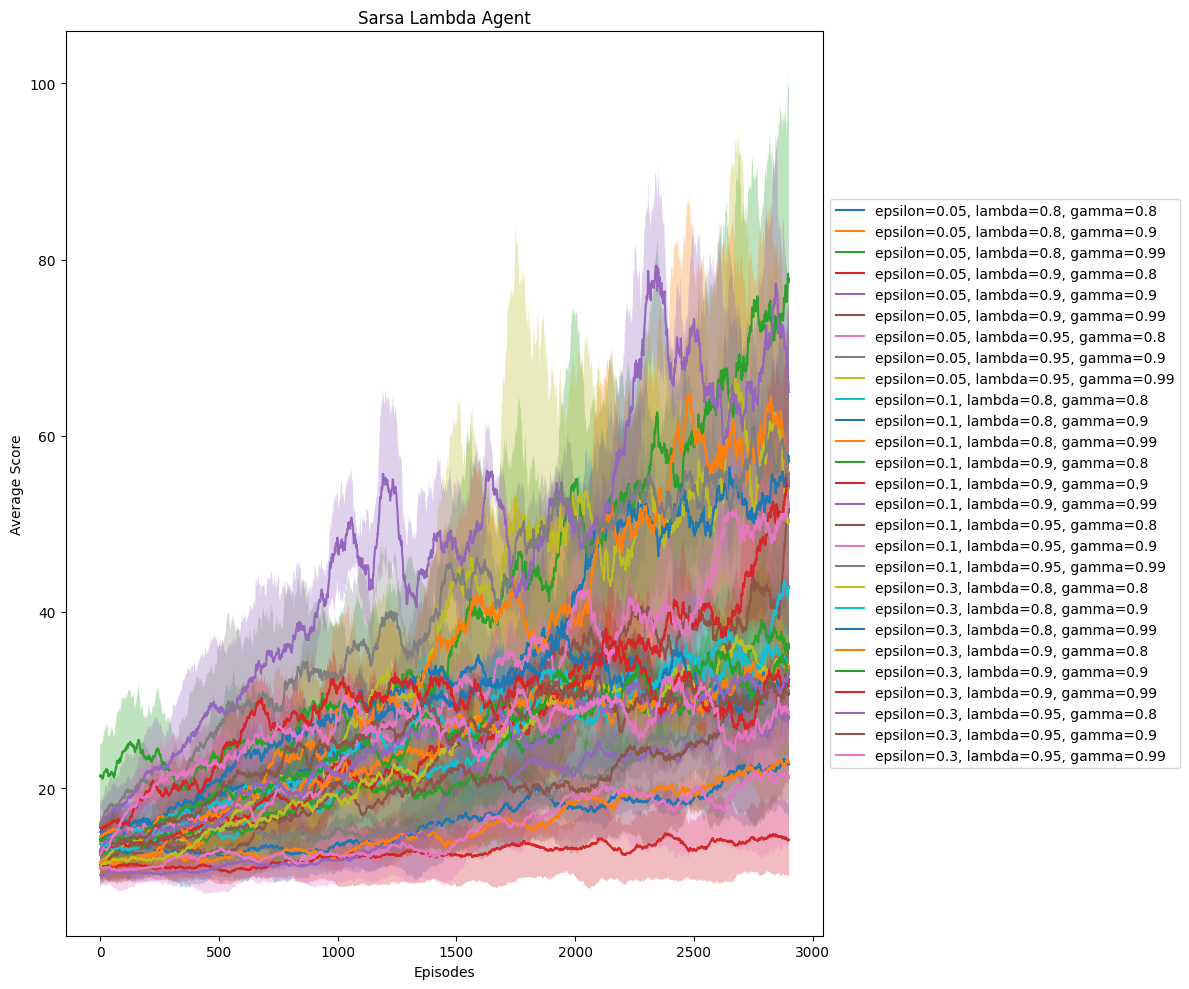

In [101]:
import matplotlib.pyplot as plt

epsilons = [0.05, 0.1, 0.3]
lambdas = [0.8, 0.9, 0.95]
gammas = [0.8, 0.9, 0.99]

plt.subplots(figsize=(12, 10))
for epsilon in epsilons:
    for lambda_ in lambdas:
        for gamma in gammas:
            smoothed_scores = []
            for seed in range(3):
                sarsa_agent = SarsaLambdaAgent(env_distance, lambda_=lambda_, gamma=gamma, epsilon=epsilon)
                sarsa_agent.train(3000, log_every=-1)
                smoothed_scores.append(sarsa_agent.smoothed_scores)
            smoothed_score_mean = np.mean(smoothed_scores, axis=0)
            smoothed_score_std = np.std(smoothed_scores, axis=0)
            plt.plot(smoothed_score_mean, label=f'epsilon={epsilon}, lambda={lambda_}, gamma={gamma}')
            plt.fill_between(range(len(smoothed_score_mean)), smoothed_score_mean - smoothed_score_std, smoothed_score_mean + smoothed_score_std, alpha=0.3)
plt.xlabel('Episodes')
plt.ylabel('Average Score')
plt.title('Sarsa Lambda Agent')
# put the legend out of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Episode 3 - Reward: 13:   0%|          | 3/3000 [00:00<00:02, 1089.34it/s]

Episode 444 - Reward: 15:  15%|█▍        | 445/3000 [00:00<00:01, 2246.30it/s]

Episode 0 - Average score: 13.0


Episode 2999 - Reward: 32: 100%|██████████| 3000/3000 [00:02<00:00, 1438.14it/s] 


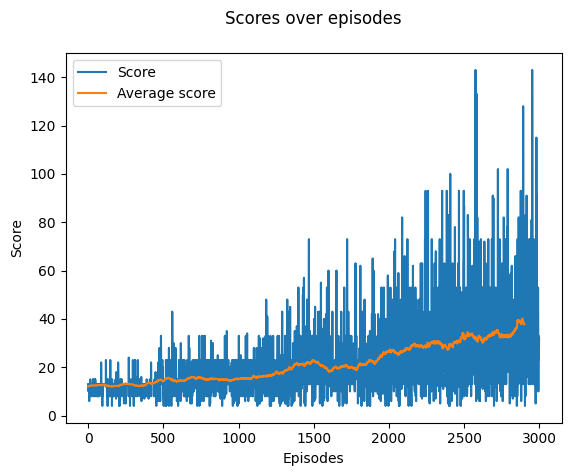

In [102]:
best_sarsa_agent = SarsaLambdaAgent(env_distance, lambda_=0.8, gamma=0.99, epsilon=0.05)
best_sarsa_agent.train(3000, log_every=-1)
best_sarsa_agent.plot_score()
sarsa_agent = deepcopy(best_sarsa_agent)

## Testing the agent on a different configuration

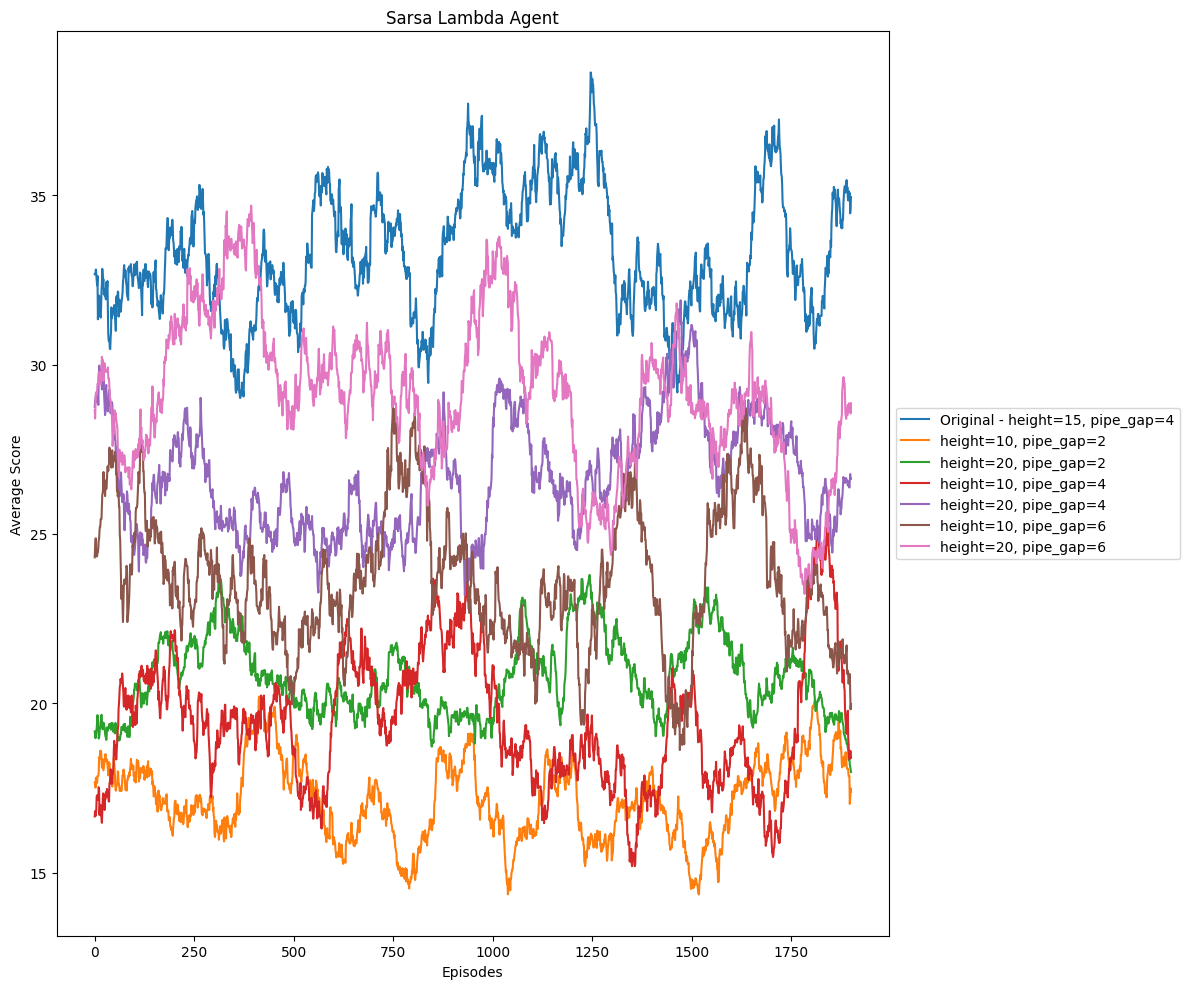

In [103]:
sarsa_agent.env = env_distance
scores_old = sarsa_agent.test(2000)

pipe_gaps = [2, 4, 6]
heights = [10, 20]

plt.subplots(figsize=(12, 10))
plt.plot(scores_old, label='Original - height=15, pipe_gap=4')
for pipe_gap in pipe_gaps:
    for height in heights:
        env = gym.make('TextFlappyBird-v0', height = height, width = 20, pipe_gap = pipe_gap)
        sarsa_agent.env = env
        scores = sarsa_agent.test(2000)
        plt.plot(scores, label=f"height={height}, pipe_gap={pipe_gap}")
plt.xlabel('Episodes')
plt.ylabel('Average Score')
plt.title('Sarsa Lambda Agent')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Stopped playing to continue running the code. Score: 499
Stopped playing to continue running the code. Score: 499
Stopped playing to continue running the code. Score: 499


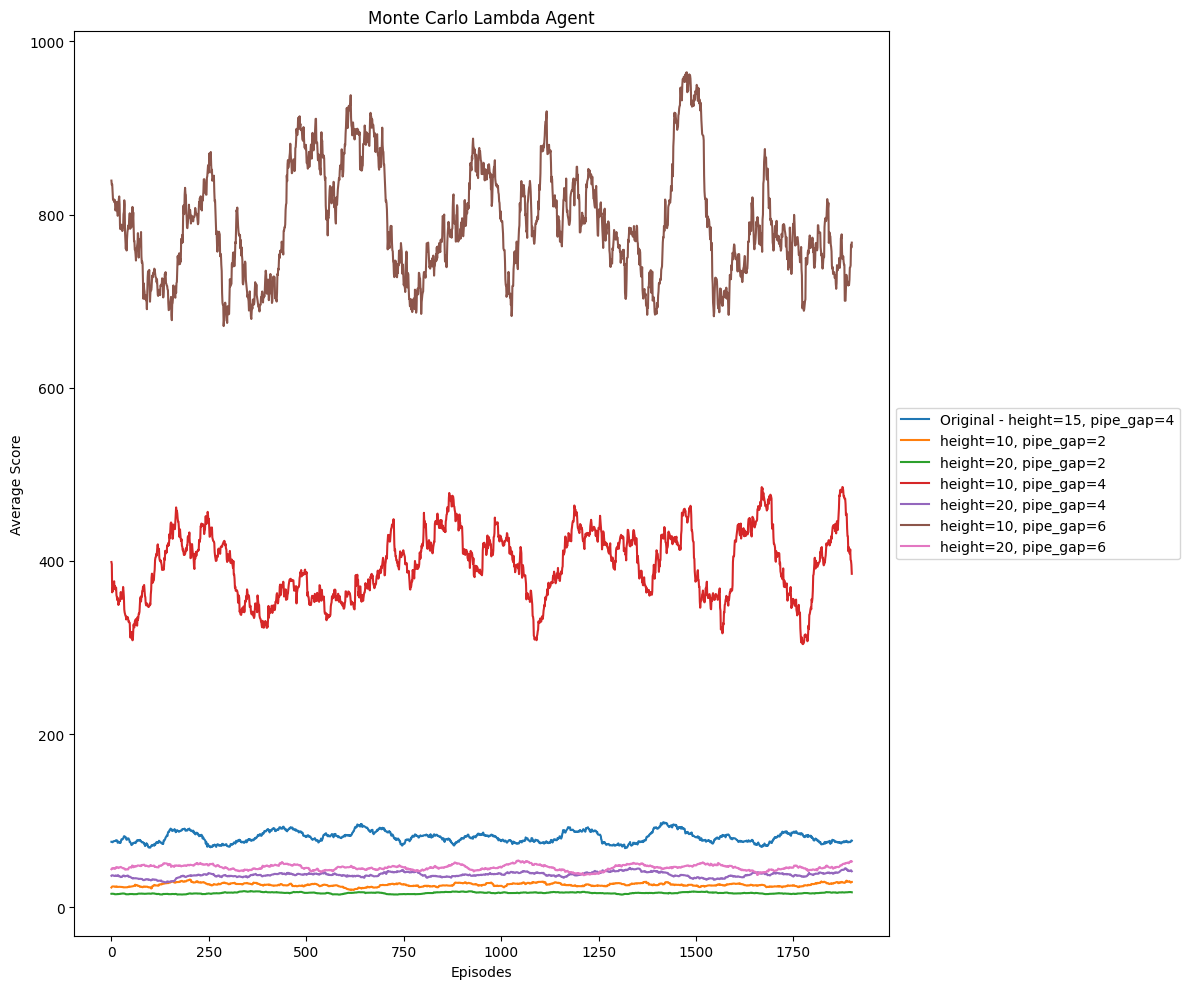

In [104]:
mc_agent.env = env_distance
scores_old = mc_agent.test(2000)

pipe_gaps = [2, 4, 6]
heights = [10, 20]

plt.subplots(figsize=(12, 10))
plt.plot(scores_old, label='Original - height=15, pipe_gap=4')
for pipe_gap in pipe_gaps:
    for height in heights:
        env = gym.make('TextFlappyBird-v0', height = height, width = 20, pipe_gap = pipe_gap)
        mc_agent.env = env
        scores = mc_agent.test(2000)
        plt.plot(scores, label=f"height={height}, pipe_gap={pipe_gap}")
plt.xlabel('Episodes')
plt.ylabel('Average Score')
plt.title('Monte Carlo Lambda Agent')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Testing the agents on the screen environment

In [105]:
mc_agent = MonteCarloAgent(env_screen, gamma=0.99, epsilon=0.01, game="screen")
mc_agent.play(render=True, slow=True)

Text Flappy Bird!
Score: 0
----------------------
[               |    ]
[               |    ]
[               |    ]
[               |    ]
[               |    ]
[               |    ]
[               |    ]
[               |    ]
[               |    ]
[                    ]
[                    ]
[                    ]
[                    ]
[               |    ]
[     *         |    ]
^^^^^^^^^^^^^^^^^^^^^^
(Idle)

Game over!


4

Episode 7 - Reward: 13:   0%|          | 7/3000 [00:00<00:32, 92.72it/s]

Episode 0 - Average score: 13.0


Episode 2999 - Reward: 19: 100%|██████████| 3000/3000 [01:07<00:00, 44.41it/s]


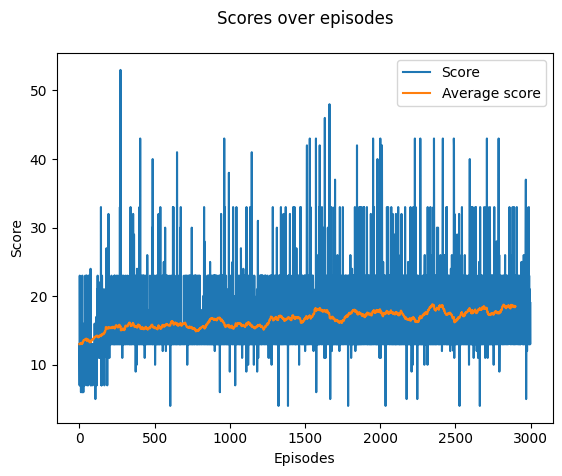

In [106]:
mc_agent.train(3000, log_every=-1)
mc_agent.plot_score()

In [107]:
mc_agent.play(render=True, slow=False)

Text Flappy Bird!
Score: 1
----------------------
[ |         |        ]
[ |         |        ]
[ |                  ]
[ |                  ]
[ |                  ]
[ |                  ]
[ |         |        ]
[           |        ]
[           |        ]
[           |        ]
[           |        ]
[ |         |        ]
[ |         |        ]
[ |         |        ]
[ |   *     |        ]
^^^^^^^^^^^^^^^^^^^^^^
(Idle)

Game over!


18

In [108]:
sarsa_agent = SarsaLambdaAgent(env_screen, lambda_=0.8, gamma=0.99, epsilon=0.05, game="screen")
sarsa_agent.play(render=True, slow=True)

Text Flappy Bird!
Score: 0
----------------------
[       |         |  ]
[       |         |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[       |         |  ]
[       |         |  ]
[       |            ]
[       |            ]
[       |            ]
[       |            ]
[       |         |  ]
[       |         |  ]
[     * |         |  ]
^^^^^^^^^^^^^^^^^^^^^^
(Idle)

Game over!


12

Episode 0 - Reward: 6:   0%|          | 0/3000 [00:00<?, ?it/s]

Episode 7 - Reward: 4:   0%|          | 7/3000 [00:00<00:28, 104.01it/s]

Episode 0 - Average score: 6.0


Episode 2999 - Reward: 12: 100%|██████████| 3000/3000 [00:34<00:00, 87.34it/s]


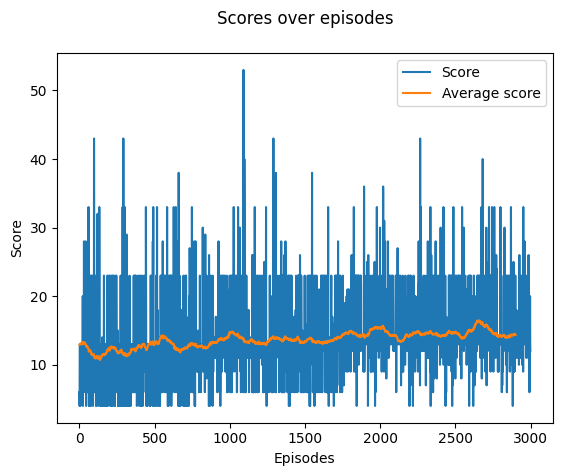

In [109]:
sarsa_agent.train(3000, log_every=-1)
sarsa_agent.plot_score()

In [110]:
sarsa_agent.play(render=True, slow=True)

Text Flappy Bird!
Score: 0
----------------------
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
[      |             ]
[     *|             ]
[      |             ]
[                    ]
[                |   ]
[                |   ]
[                |   ]
[      |         |   ]
[      |         |   ]
[      |         |   ]
^^^^^^^^^^^^^^^^^^^^^^
(Flap)

Game over!


13

We notice that the agents are not able to perform well in the screen environment, and this is because the state space is much larger than the previous environment. Moreover, in the first environment, the state space had a prior structure about how to win the game, when this is not the case in the this environment.

The conclusion here is that the choice of the representation of the state space is crucial for the performance of the agent.

## Testing the agents on the real Flappy Bird game

In [111]:
import flappy_bird_gym

env_flappy = flappy_bird_gym.make('FlappyBird-v0')
obs_flappy = env_flappy.reset()

/Users/aliramlaoui/anaconda3/envs/altegrad/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/Users/aliramlaoui/anaconda3/envs/altegrad/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/Users/aliramlaoui/anaconda3/envs/altegrad/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


In [112]:
env_flappy.observation_space

Box(-inf, inf, (2,), float32)

The observation space of the real Flappy Bird game is different from the observation space of the environment we used to train the agents and it is continuous. We will try to quantize the observation space and test the training of agents on the real Flappy Bird game with this method.

In [113]:
env_flappy.step(0)

/Users/aliramlaoui/anaconda3/envs/altegrad/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/Users/aliramlaoui/anaconda3/envs/altegrad/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/Users/aliramlaoui/anaconda3/envs/altegrad/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/Users/aliramlaoui/anaconda3/envs/altegrad/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

(array([ 1.64236111, -0.01171875]), 1, False, {'score': 0})

In [114]:
mc_agent = MonteCarloAgent(env_flappy, gamma=0.8, epsilon=0.05, game="flappy")
mc_agent.play(render=True, slow=False)

None
Game over!


101

In [115]:
mc_agent.train(1000, log_every=-1)

  0%|          | 0/1000 [00:00<?, ?it/s]

Episode 0 - Reward: 101:   0%|          | 0/1000 [00:00<?, ?it/s]

Episode 0 - Average score: 101.0


Episode 999 - Reward: 101: 100%|██████████| 1000/1000 [00:38<00:00, 26.24it/s]


In [116]:
sarsa_agent = SarsaLambdaAgent(env_flappy, lambda_=0.8, gamma=0.99, epsilon=0.05, game="flappy")
sarsa_agent.train(3000, log_every=-1)

Episode 19 - Reward: 101:   1%|          | 20/3000 [00:00<00:31, 95.84it/s]

Episode 0 - Average score: 101.0


Episode 2999 - Reward: 101: 100%|██████████| 3000/3000 [00:31<00:00, 95.17it/s]


We notice that even with a quantized observation space, the agents are not able to perform well in the real Flappy Bird game. Continuous algorithms and agents are needed to solve this problem, or a more sophisticated representation of the state space with correct tiling.

## State-Value plots

{(13, 1): {0: 26.509154099642092, 1: 6.505355645190535}, (12, 1): {0: 27.387345709496607, 1: 7.008928036232249}, (11, 3): {1: 28.516994275480524, 0: 10.609463740814782}, (10, 2): {0: 28.067485379079645, 1: 21.67595696478998}, (9, 3): {0: 24.90794621044312, 1: 17.7314855251384}, (8, 6): {0: 2.348961646200938, 1: 28.346227051418474}, (7, 5): {1: 28.436540400895755, 0: 4.622797145246766}, (6, 4): {1: 28.000886540170782, 0: 5.4407284842242225}, (5, 3): {1: 27.372716242335166, 0: 4.556880578333085}, (4, 2): {0: 21.431276329511277, 1: 26.78619310948105}, (3, 3): {1: 22.105388157129596, 0: 2.1085629526885548}, (2, 2): {1: 26.24287136571728, 0: 1.9829505094790978}, (1, 1): {0: 0.9999998309981739, 1: 26.415451251548074}, (0, 2): {1: 0, 0: 0}, (13, 3): {1: 27.749426798893882, 0: 4.680542654053446}, (12, 2): {0: 26.575366562707988, 1: 9.118396434557333}, (13, -5): {0: 28.16129061626003, 1: 8.209859735318856}, (12, -5): {0: 26.815434592993572, 1: 12.76880776247975}, (11, -3): {1: 26.15474701609956

[Text(1, -1, 'None'), Text(1, 0, 'Do nothing'), Text(1, 1, 'Flap')]

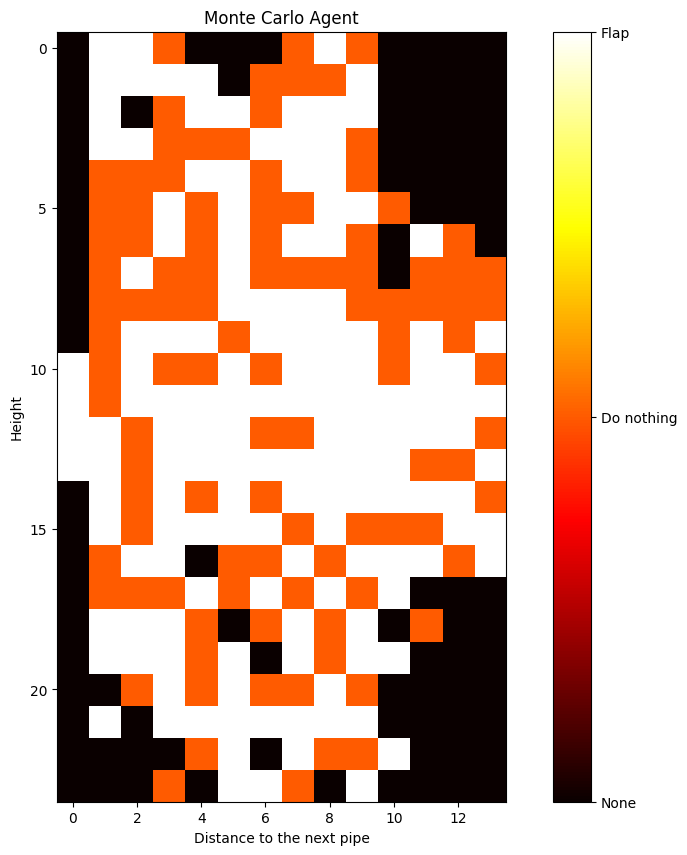

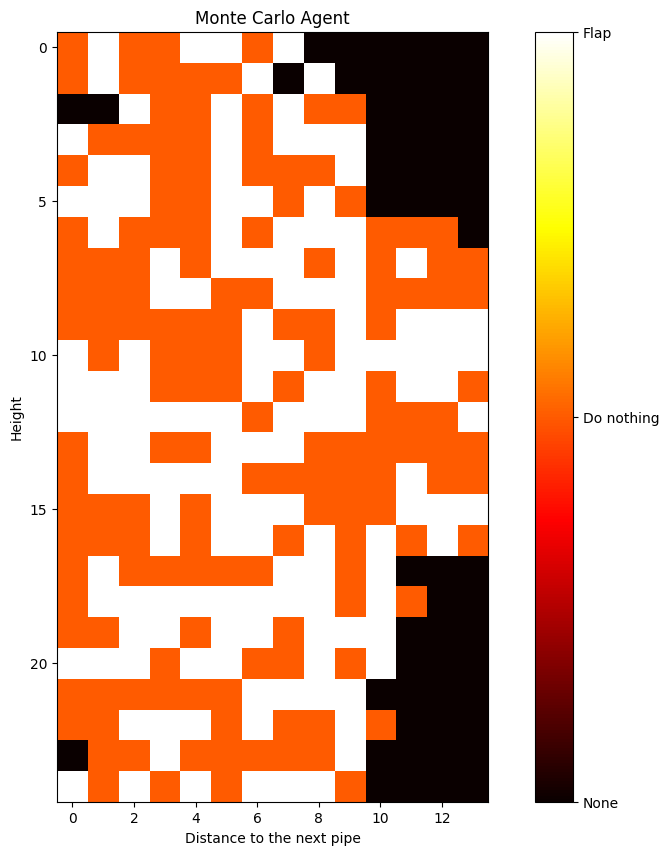

In [117]:
# Monte Carlo Agent
Q_values = best_mc_agent.Q
states = list(Q_values.keys())
x = np.unique([state[0][0] for state in states])
y = np.unique([state[0][1] for state in states])

q_values = []
actions = [0, 1]
for y_ in y:
    q_values.append([])
    for x_ in x:
        max_q = -np.inf
        q_values[-1].append(-1)
        action = 0
        state = ((x_, y_), action)
        if state in Q_values:
            if Q_values[state] > max_q:
                max_q = Q_values[state]
                q_values[-1][-1] = 0
        action = 1
        state = ((x_, y_), action)
        if state in Q_values:
            if Q_values[state] > max_q:
                max_q = Q_values[state]
                q_values[-1][-1] = 1

plt.subplots(figsize=(12, 10))
imshow = plt.imshow(q_values, cmap='hot', interpolation='nearest')
plt.xlabel('Distance to the next pipe')
plt.ylabel('Height')
plt.title('Monte Carlo Agent')
cbar = plt.colorbar(ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['None', 'Do nothing', 'Flap'])

# Sarsa Agent
Q_values = best_sarsa_agent.Q
print(Q_values)
states = list(Q_values.keys())
x = np.unique([state[0] for state in states])
y = np.unique([state[1] for state in states])

q_values = []
actions = [0, 1]
for y_ in y:
    q_values.append([])
    for x_ in x:
        max_q = -np.inf
        q_values[-1].append(-1)
        action = 0
        state = (x_, y_)
        if state in Q_values:
            if 0 in Q_values[state] and Q_values[state][0] > max_q:
                max_q = Q_values[state][0]
                q_values[-1][-1] = 0
        action = 1
        if state in Q_values:
            if 1 in Q_values[state] and Q_values[state][1] > max_q:
                max_q = Q_values[state][1]
                q_values[-1][-1] = 1

plt.subplots(figsize=(12, 10))
imshow = plt.imshow(q_values, cmap='hot', interpolation='nearest')
plt.xlabel('Distance to the next pipe')
plt.ylabel('Height')
plt.title('Monte Carlo Agent')
cbar = plt.colorbar(ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['None', 'Do nothing', 'Flap'])